In [29]:
import os
import pandas as pd
import pyam
import csv

### 

In [30]:
cwd = os.getcwd()

# path to the results file (in IAMC format)
path = "..\\Conversion-Script\\File_Converted\\"

try:
    # df = pd.read_csv(path + "Baseline no policies no CO2taxconverted.csv", sep=",")
    df = pyam.IamDataFrame(path + "Baseline no policies no CO2taxconverted.csv")
except:
    print("ERROR opening the file with results in IAMC format")

[INFO] 16:16:11 - pyam.core: Reading file ..\Conversion-Script\File_Converted\Baseline no policies no CO2taxconverted.csv
C:\Users\AdGeeds\AppData\Roaming\Python\Python310\site-packages\pyam\utils.py:316: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.set_index(index + REQUIRED_COLS + extra_cols)


In [34]:
class TrieNode:
    """A node in the Trie structure."""

    def __init__(self):
        self.children = {}
        self.is_end_of_word = False


class Trie:
    """A Trie data structure for efficient prefix-based search."""

    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        """
        Inserts a word into the Trie.

        Args:
            word (str): The word to insert.
        """
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_end_of_word = True

    def search(self, prefix):
        """
        Searches for all words in the Trie that start with the given prefix.

        Args:
            prefix (str): The prefix to search for.

        Returns:
            List[str]: A list of words that start with the prefix.
        """
        node = self.root
        for char in prefix:
            if char not in node.children:
                return []
            node = node.children[char]
        return self._find_words_with_prefix(node, prefix)

    def _find_words_with_prefix(self, node, prefix):
        """
        Recursively finds all words in the Trie that start with the given prefix.

        Args:
            node (TrieNode): The current Trie node.
            prefix (str): The current prefix.

        Returns:
            List[str]: A list of words that start with the prefix.
        """
        results = []
        if node.is_end_of_word:
            results.append(prefix)
        for char, child_node in node.children.items():
            results.extend(self._find_words_with_prefix(child_node, prefix + char))
        return results


def load_words_from_csv(file_path):
    """
    Loads words from the fourth column of a CSV file into a Trie.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        Trie: A Trie containing the words from the fourth column of the CSV file.
    """
    trie = Trie()
    with open(file_path, "r", newline="") as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) >= 4:  # Ensure the row has at least 4 columns
                word = row[3].strip()
                trie.insert(word)
    return trie


def suggest_completions(trie, prefix):
    """
    Suggests word completions for a given prefix using the Trie.

    Args:
        trie (Trie): The Trie containing the words.
        prefix (str): The prefix to search for.

    Returns:
        List[str]: A list of word completions for the given prefix.
    """
    return trie.search(prefix)


file_path = (
    path + "Baseline no policies no CO2taxconverted.csv"
)  # Specify the path to your file
trie = load_words_from_csv(file_path)


In [37]:
if __name__ == "__main__":
    prefix = input("Enter a prefix to search for completions: ")
    completions = suggest_completions(trie, prefix)
    print("Completions:", completions)


Completions: ['Final Energy|Crops|Electricity', 'Final Energy|Crops|Gas', 'Final Energy|Crops|Heat', 'Final Energy|Crops|Hydrogen', 'Final Energy|Crops|Liquid', 'Final Energy|Crops|Solid|Biomass', 'Final Energy|Crops|Solid|Fossil', 'Final Energy|Construction|Electricity', 'Final Energy|Construction|Gas', 'Final Energy|Construction|Heat', 'Final Energy|Construction|Hydrogen', 'Final Energy|Construction|Liquid', 'Final Energy|Construction|Solid|Biomass', 'Final Energy|Construction|Solid|Fossil']


[INFO] 16:23:44 - pyam.plotting: >=13 labels, not applying legend


2005  \
model  scenario                       region                           variable                       unit                   
WILIAM Baseline no policies no CO2tax Austria                          Final Energy|Crops|Electricity TJ/yr    1466.000000   
                                      Belgium                          Final Energy|Crops|Electricity TJ/yr    1036.000000   
                                      Bulgaria                         Final Energy|Crops|Electricity TJ/yr     230.000000   
                                      China                            Final Energy|Crops|Electricity TJ/yr  310168.000000   
                                      Croatia                          Final Energy|Crops|Electricity TJ/yr     207.000000   
                                      Cyprus                           Final Energy|Crops|Electricity TJ/yr     172.000000   
                                      Czech Republic                   Final Energy|Crops|Electricity TJ/yr    2627.000000   
                                      Denmark                          Final Energy|Crops|Electricity TJ/yr    1811.000000   
                                      East Asia and Oceania            Final Energy|Crops|Electricity TJ/yr  124549.000000   
                                      Estonia                          Final Energy|Crops|Electricity TJ/yr     236.000000   
                                      Finland                          Final Energy|Crops|Electricity TJ/yr    2689.000000   
                                      France                           Final Energy|Crops|Electricity TJ/yr   15030.000000   
                                      Germany                          Final Energy|Crops|Electricity TJ/yr       0.236875   
                                      Greece                           Final Energy|Crops|Electricity TJ/yr    7357.000000   
                                      Hungary                          Final Energy|Crops|Electricity TJ/yr    2079.000000   
                                      India                            Final Energy|Crops|Electricity TJ/yr  732604.000000   
                                      Ireland                          Final Energy|Crops|Electricity TJ/yr     691.000000   
                                      Italy                            Final Energy|Crops|Electricity TJ/yr   14133.000000   
                                      Latin America                    Final Energy|Crops|Electricity TJ/yr   73429.900000   
                                      Latvia                           Final Energy|Crops|Electricity TJ/yr     445.000000   
                                      Lithuania                        Final Energy|Crops|Electricity TJ/yr     509.000000   
                                      Luxembourg                       Final Energy|Crops|Electricity TJ/yr      19.998600   
                                      Malta                            Final Energy|Crops|Electricity TJ/yr       5.995440   
                                      Netherlands                      Final Energy|Crops|Electricity TJ/yr   11444.000000   
                                      Poland                           Final Energy|Crops|Electricity TJ/yr    4147.850000   
                                      Portugal                         Final Energy|Crops|Electricity TJ/yr    1772.000000   
                                      Rest of the World                Final Energy|Crops|Electricity TJ/yr  224665.000000   
                                      Romania                          Final Energy|Crops|Electricity TJ/yr    2444.000000   
                                      Russia                           Final Energy|Crops|Electricity TJ/yr   21104.000000   
                                      Slovak Republic                  Final Energy|Crops|Electricity TJ/yr     332.999000   
                                      Slovenia                         Final Energy|Cr

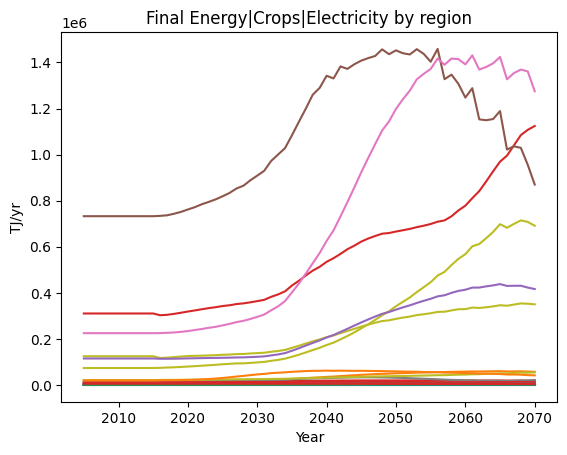

In [41]:
# Choose one of your wanted variable with the completion
model, scenario = "WILIAM", "Baseline no policies no CO2tax"
variable = "Final Energy|Crops|Electricity"
data = df.filter(model=model, scenario=scenario, variable=variable)


data.plot(color="region", title= variable +  " by region")
data.timeseries()
